## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [1]:
# write your code from here

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [2]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

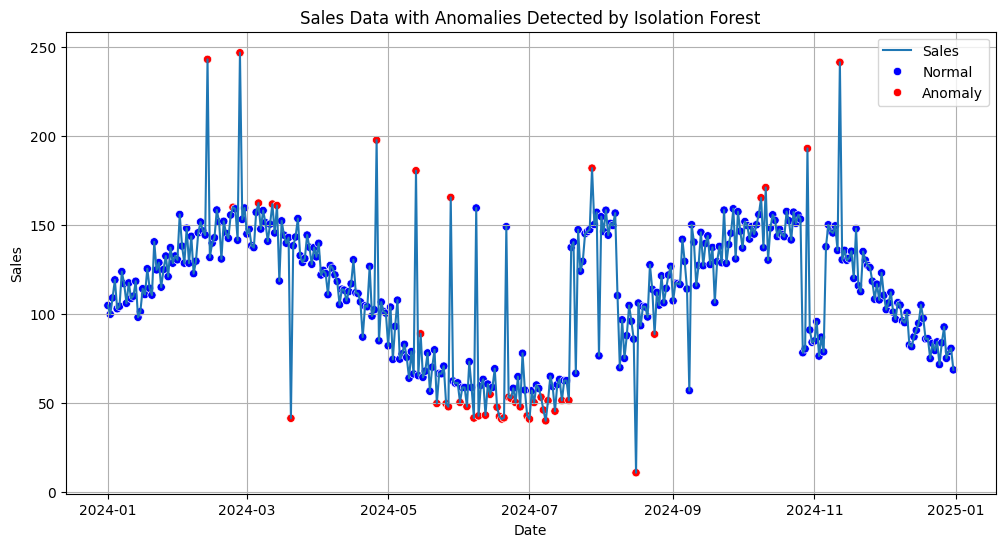

Anomaly counts:
anomaly_label
Normal     321
Anomaly     45
Name: count, dtype: int64


ValueError: Negative values in data passed to X.

In [3]:
# Task 1: Training a model to predict and flag unusual trend patterns in sales data that deviate from historical norms.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Create synthetic sales data with some anomalies
np.random.seed(42)
dates = pd.to_datetime(pd.date_range('2024-01-01', '2024-12-31', freq='D'))
base_sales = np.sin(np.linspace(0, 10, len(dates))) * 50 + 100 + np.random.normal(0, 10, len(dates))
sales = base_sales.copy()

# Introduce some unusual patterns (anomalies)
sales[np.random.randint(0, len(sales), 10)] += 100  # Sudden spikes
sales[np.random.randint(0, len(sales), 5)] -= 80   # Sudden drops
sales[200:220] += 70                               # Prolonged increase
sales[300:310] -= 60                               # Prolonged decrease

df_sales = pd.DataFrame({'date': dates, 'sales': sales})

# 2. Feature Engineering (optional but can be helpful)
# You could add features like moving averages, seasonality components, etc.
# For simplicity, we'll use the raw sales data.

# 3. Train an anomaly detection model (Isolation Forest)
# Isolation Forest is suitable for detecting outliers in univariate or multivariate data.
model = IsolationForest(contamination='auto', random_state=42)
df_sales['anomaly'] = model.fit_predict(df_sales[['sales']])
df_sales['anomaly_label'] = df_sales['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# 4. Visualize the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=df_sales, label='Sales')
sns.scatterplot(x='date', y='sales', hue='anomaly_label', data=df_sales, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Sales Data with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Anomaly counts:")
print(df_sales['anomaly_label'].value_counts())

# Task 2: Using clustering algorithms to detect duplicate records where entries are not exactly identical.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create a mock dataset with near-duplicate records
data = {
    'product_name': [
        'Laptop Model X',
        'Laptop Model X',
        'Laptop Model Y',
        'Laptop Model Y - New',
        'Wireless Mouse',
        'Wireless Mouse - Black',
        'Office Keyboard',
        'Office Keyboard Standard'
    ],
    'description': [
        'High-performance laptop with 16GB RAM and 512GB SSD.',
        'High performance laptop, 16 GB RAM, 512 GB SSD.',
        'Lightweight laptop with 8GB RAM and 256GB SSD.',
        'New lightweight laptop, 8GB RAM, 256GB SSD, improved battery.',
        'Ergonomic wireless mouse with USB receiver.',
        'Black ergonomic wireless mouse with USB receiver.',
        'Standard office keyboard with numeric keypad.',
        'Standard office keyboard with numeric keypad and media controls.'
    ]
}
df_duplicates = pd.DataFrame(data)

# 2. Feature Engineering: Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_duplicates['product_name'] + ' ' + df_duplicates['description'])

# 3. Apply a clustering algorithm (DBSCAN)
# DBSCAN is good for finding clusters of varying shapes and doesn't require specifying the number of clusters beforehand.
# We'll use cosine similarity as the distance metric.
similarity_matrix = cosine_similarity(tfidf_matrix)
# Convert similarity to distance (1 - similarity)
distance_matrix = 1 - similarity_matrix

# Apply DBSCAN
# 'eps' controls the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# 'min_samples' controls the number of neighbors a core point needs to have.
dbscan = DBSCAN(eps=0.15, min_samples=2, metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
df_duplicates['cluster'] = clusters

# 4. Display the results
print("\nNear-Duplicate Records Detected using DBSCAN:")
for cluster_id in sorted(df_duplicates['cluster'].unique()):
    if cluster_id != -1:  # -1 represents outliers (unique records)
        print(f"\nCluster {cluster_id}:")
        print(df_duplicates[df_duplicates['cluster'] == cluster_id])

print("\nUnique Records (Outliers):")
print(df_duplicates[df_duplicates['cluster'] == -1])

# Task 3: Implementing classification models to validate data based on learned characteristics from labeled datasets.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a mock labeled dataset for data validation
np.random.seed(42)
n_samples = 1000

df_validation = pd.DataFrame({
    'transaction_amount': np.random.normal(50, 20, n_samples),
    'user_activity_level': np.random.randint(1, 10, n_samples),
    'location_risk_score': np.random.rand(n_samples),
    'ip_reputation_score': np.random.rand(n_samples),
    'is_valid': np.random.choice([True, False], n_samples, p=[0.95, 0.05]) # Labeled: True if valid, False if invalid
})

# Introduce some patterns for invalid data
df_validation.loc[(df_validation['transaction_amount'] > 150) & (df_validation['location_risk_score'] > 0.8), 'is_valid'] = False
df_validation.loc[(df_validation['user_activity_level'] < 2) & (df_validation['ip_reputation_score'] < 0.2), 'is_valid'] = False

# Convert boolean labels to integers (0 for False, 1 for True)
df_validation['is_valid_int'] = df_validation['is_valid'].astype(int)

# 2. Prepare features and labels
X_validate = df_validation[['transaction_amount', 'user_activity_level', 'location_risk_score', 'ip_reputation_score']]
y_validate = df_validation['is_valid_int']

# Split data into training and testing sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_validate, y_validate, test_size=0.3, random_state=42)

# 3. Train a classification model (Random Forest Classifier)
model_validate = RandomForestClassifier(random_state=42)
model_validate.fit(X_train_val, y_train_val)

# 4. Evaluate the model
y_pred_val = model_validate.predict(X_test_val)

accuracy_val = accuracy_score(y_test_val, y_pred_val)
report_val = classification_report(y_test_val, y_pred_val)

print("\nData Validation using Classification Model:")
print(f"Accuracy: {accuracy_val:.4f}")
print("\nClassification Report:")
print(report_val)

# 5. Use the trained model to predict the validity of new, unseen data
new_data = pd.DataFrame({
    'transaction_amount': [60, 200, 30, 10],
    'user_activity_level': [5, 1, 8, 2],
    'location_risk_score': [0.3, 0.9, 0.1, 0.1],
    'ip_reputation_score': [0.7, 0.8, 0.9, 0.1]
})

predictions_new = model_validate.predict(new_data)
print("\nPredictions for new data:")
print(new_data)
print("Predicted validity (1: valid, 0: invalid):", predictions_new)